<a href="https://colab.research.google.com/github/puneethkumarvydya/Capstone-Project/blob/main/Questions_Project_2_Sequential_Models_in_NLP_Sarcasm_Detection_200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (3 Marks)

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__
import pandas as pd
import numpy as np
import os
import google_drive_downloader
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/LSTM-Project/') 
os.listdir()

['glove.6B.zip',
 'Sarcasm_Headlines_Dataset.json',
 'glove.6B.50d.txt',
 'glove.6B.100d.txt',
 'glove.6B.200d.txt',
 'glove.6B.300d.txt']

In [ ]:
from zipfile import ZipFile
with ZipFile("glove.6B.zip",'r') as z:
  z.extractall()

In [ ]:
os.listdir()
#os.chdir('Sarcasm Detection/Data')
os.listdir()

['glove.6B.zip',
 'Sarcasm_Headlines_Dataset.json',
 'glove.6B.50d.txt',
 'glove.6B.100d.txt',
 'glove.6B.200d.txt',
 'glove.6B.300d.txt']

In [ ]:

#json.loads('/content/drive/My Drive/LSTM-Project/Sarcasm_Headlines_Dataset.json')
data = pd.read_json('/content/drive/My Drive/LSTM-Project/Sarcasm_Headlines_Dataset.json',lines=True)

### Drop `article_link` from dataset (3 Marks)

In [ ]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
data.info()
data = data.drop('article_link',axis=1)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### Get length of each headline and add a column for that (3 Marks)

In [ ]:
headline_len = [len(x) for x in data.headline]
#headline_len

In [ ]:
data["Headlinelen"] = headline_len
data.head()

,headline,is_sarcastic,Headlinelen
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


In [ ]:
print(len(data.headline[0]))
data.is_sarcastic.value_counts()

78


0    14985
1    11724
Name: is_sarcastic, dtype: int64

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [ ]:
max_features = 10000
maxlen = 25
embedding_size = 200

In [ ]:
print(data.headline[0])

former versace store clerk sues over secret 'black code' for minority shoppers


### Apply `tensorflow.keras` Tokenizer and get indices for words (3 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocabSize = 10000
tokenizer = Tokenizer(num_words=vocabSize, split=' ',oov_token=None)
tokenizer.fit_on_texts(data['headline'])

In [ ]:
X = tokenizer.texts_to_sequences(data['headline'])

In [ ]:
X[0:10]

[[307, 678, 3336, 2297, 47, 381, 2575, 5, 2576, 8433],
 [3, 8434, 3337, 2745, 21, 1, 165, 8435, 415, 3111, 5, 257, 8, 1001],
 [144, 837, 1, 906, 1748, 2092, 581, 4718, 220, 142, 38, 45, 1],
 [1484, 35, 223, 399, 1, 1831, 28, 318, 21, 9, 2923, 1392, 6968, 967],
 [766, 718, 4719, 907, 622, 593, 4, 3, 94, 1308, 91],
 [3, 364, 72],
 [3, 6969, 350, 5, 460, 4273, 2194, 1485],
 [18, 478, 38, 1167, 30, 154, 1, 98, 82, 17, 157, 5, 31, 351],
 [248, 3622, 6970, 554, 5273, 1994, 140],
 [2093, 325, 346, 400, 59, 5, 3, 3895]]

### Pad sequences (3 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [ ]:
from tensorflow.keras.preprocessing import sequence

In [ ]:
max_len = data['Headlinelen'].max()
max_len

254

In [ ]:
X= sequence.pad_sequences(X,padding='post',truncating='post',maxlen=25)

In [ ]:
print(X.shape)
X[1]

(26709, 25)


array([   3, 8434, 3337, 2745,   21,    1,  165, 8435,  415, 3111,    5,
        257,    8, 1001,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [ ]:
target = data.is_sarcastic.to_numpy()

In [ ]:
print(target.shape)
target[0:10]


(26709,)


array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

### Vocab mapping
- There is no word for 0th index

In [ ]:
#tokenizer.word_index

In [ ]:
word_index = tokenizer.word_index

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [ ]:
word_index.get('lose')

838

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)
print(tokenizer.num_words)
#print(tokenizer.word_index.items())
print(len(word_index) + 1)

29657
10000
29657


### Load Glove Word Embeddings (3 Marks)

Already loaded the Glove word embedding 


### Create embedding matrix

In [ ]:
vocab_size = 10000
embeddings_index = dict()
f = open('./glove.6B.200d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 200))
print(embedding_matrix.shape)


for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
  

(29657, 200)


In [ ]:
#EMBEDDING_FILE = './glove.6B.200d.txt'

#embeddings = {}
#for o in open(EMBEDDING_FILE):
#    word = o.split(" ")[0]
   # print(word)
#   embd = o.split(" ")[1:]
#  embd = np.asarray(embd, dtype='float32')
    # print(embd)
#    embeddings[word] = embd

# create a weight matrix for words in training docs
#embedding_matrix = np.zeros((num_words, 200))

##	embedding_vector = embeddings.get(word)
##		embedding_matrix[i] = embedding_vector

### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda, Flatten, Input, Add


In [ ]:
lstm_out = 64
model_1 = Sequential()
model_1.add(Embedding(num_words, embedding_size,weights=[embedding_matrix],input_length = 25,trainable=False))

model_1.add(Bidirectional(LSTM(lstm_out, return_sequences=True)))
#model_1.add((LSTM(lstm_out, return_sequences=True)))
model_1.add(Flatten())
model_1.add(Dense(32, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='sigmoid'))



### Compile the model (3 Marks)

In [ ]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 200)           5931400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 25, 128)           135680    
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                102432    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 6,169,545
Trainable params: 238,145
Non-trainable params: 5,931,400
______________________________________

### Fit the model (4 Marks)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18696, 25)
(18696,)
(8013, 25)
(8013,)


In [ ]:
print(X.shape)
print(target.shape)

(26709, 25)
(26709,)


In [ ]:
from tensorflow.keras.callbacks import  EarlyStopping, ReduceLROnPlateau
batch_size =200
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
history =model_1.fit(X_train , y_train, epochs = 20, batch_size=batch_size,callbacks=[stop], verbose = 2,validation_split=.2)


Epoch 1/20
75/75 - 1s - loss: 0.5714 - accuracy: 0.6910 - val_loss: 0.4894 - val_accuracy: 0.7540
Epoch 2/20
75/75 - 1s - loss: 0.4307 - accuracy: 0.8068 - val_loss: 0.3914 - val_accuracy: 0.8227
Epoch 3/20
75/75 - 1s - loss: 0.3639 - accuracy: 0.8431 - val_loss: 0.3613 - val_accuracy: 0.8385
Epoch 4/20
75/75 - 1s - loss: 0.3171 - accuracy: 0.8658 - val_loss: 0.3551 - val_accuracy: 0.8457
Epoch 5/20
75/75 - 1s - loss: 0.2710 - accuracy: 0.8903 - val_loss: 0.3652 - val_accuracy: 0.8473
Epoch 6/20
75/75 - 1s - loss: 0.2432 - accuracy: 0.9019 - val_loss: 0.3866 - val_accuracy: 0.8283
Epoch 7/20
75/75 - 1s - loss: 0.2092 - accuracy: 0.9174 - val_loss: 0.3880 - val_accuracy: 0.8529
Epoch 8/20
75/75 - 1s - loss: 0.1739 - accuracy: 0.9323 - val_loss: 0.3690 - val_accuracy: 0.8580
Epoch 9/20
75/75 - 1s - loss: 0.1525 - accuracy: 0.9436 - val_loss: 0.4323 - val_accuracy: 0.8535
Epoch 10/20
75/75 - 1s - loss: 0.1205 - accuracy: 0.9551 - val_loss: 0.5340 - val_accuracy: 0.8492
Epoch 11/20
75/75 -

In [ ]:
y_test_predict = model_1.predict(X_test)
y_train_predict = model_1.predict(X_train)

In [ ]:
score,acc = model_1.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

41/41 - 0s - loss: 0.8697 - accuracy: 0.8455
score: 0.87
acc: 0.85


In [ ]:
print("Predict:",y_test_predict[0], "Actual " ,(y_test[0]))

Predict: [1.] Actual  1


In [ ]:
score,acc = model_1.evaluate(X_train, y_train, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

94/94 - 0s - loss: 0.1786 - accuracy: 0.9679
score: 0.18
acc: 0.97


In [ ]:
df_m=pd.DataFrame(history.history)
df_m['Epoch']=range(1,21)

df_m.index=df_m['Epoch']
print(df_m.shape)
df_m.head()

(20, 5)


,loss,accuracy,val_loss,val_accuracy,Epoch
Epoch,,,,,
1,0.571387,0.691027,0.489364,0.754011,1
2,0.430731,0.806767,0.391370,0.822727,2
3,0.363885,0.843073,0.361329,0.838503,3
4,0.317149,0.865806,0.355126,0.845722,4
5,0.271027,0.890278,0.365197,0.847326,5


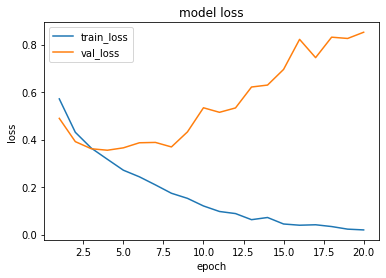

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_m['loss'])
plt.plot(df_m['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

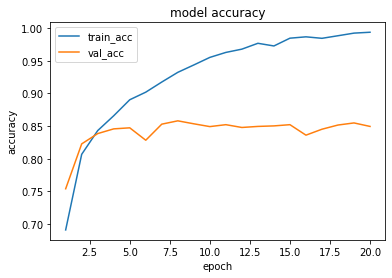

In [ ]:
plt.plot(df_m['accuracy'])
plt.plot(df_m['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()

This model is overfitting.Differnet glove embedding can be tried to check the performance.